In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\ExcelR\Assigments\Simple_linear_Regression\delivery_time.csv")

In [3]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

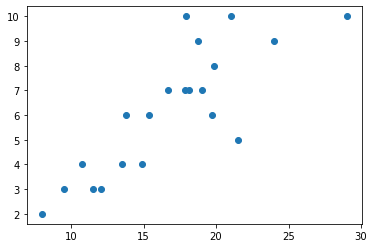

In [6]:
plt.scatter(x='Delivery Time',y='Sorting Time',data=data)

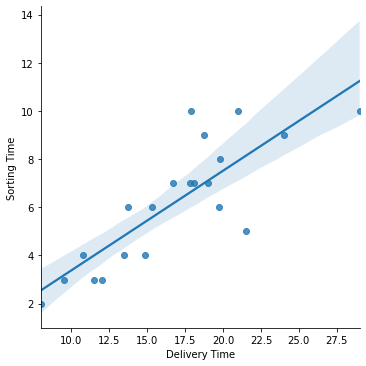

In [7]:
sns.lmplot(x='Delivery Time',y='Sorting Time',data=data)

In [8]:
linear_model = LinearRegression()

In [9]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
import statsmodels.formula.api as smf

In [3]:
data.rename(columns ={"Delivery Time" : "DeliveryTime" , "Sorting Time" : "SortingTime"},inplace=True)

In [12]:
linear_model=smf.ols(formula ='DeliveryTime ~ SortingTime' ,data=data)

In [13]:
linear_model=linear_model.fit()

In [14]:
linear_model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [15]:
predicteddata = linear_model.predict(data)
predicteddata

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [16]:
data['predicted'] = predicteddata

In [17]:
data

,DeliveryTime,SortingTime,predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [18]:
y = data['DeliveryTime']

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error is: ',mean_squared_error(y,predicteddata))
print('R2 score is: ',r2_score(y,predicteddata))

Mean square error is:  7.793311548584062
R2 score is:  0.6822714748417231


## logrithm transformation

In [5]:
x_log = np.log(data['SortingTime']).values.reshape(-1,1)
y_log = np.log(data['DeliveryTime']).values.reshape(-1,1)

In [8]:
log_model=smf.ols(formula ='y_log ~ x_log' ,data=data).fit()

In [9]:
log_model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [10]:
y_pred = log_model.predict(data)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error is: ',mean_squared_error(y_log,y_pred))
print('R2 score is: ',r2_score(y_log,y_pred))

Mean square error is:  0.021973058112488137
R2 score is:  0.77216134926874


## SQRT Transformation

In [13]:
sqrt_x = (data['SortingTime']**(1/2)).values.reshape(-1,1)
sqrt_y = (data['DeliveryTime']**(1/2)).values.reshape(-1,1)

In [14]:
sqrt_model=smf.ols(formula ='sqrt_y ~ sqrt_x' ,data=data).fit()

In [15]:
sqrt_model.params

Intercept    1.613479
sqrt_x       1.002217
dtype: float64

In [16]:
y_pred1 = sqrt_model.predict(data)

In [17]:
print('Mean square error is: ',mean_squared_error(sqrt_y,y_pred1))
print('R2 score is: ',r2_score(sqrt_y,y_pred1))

Mean square error is:  0.10106690385613769
R2 score is:  0.7292011987544664


## Reciprocal Transformation 

In [18]:
rcp_x = (1/data['SortingTime']).values.reshape(-1,1)
rcp_y = (1/data['DeliveryTime']).values.reshape(-1,1)

In [19]:
rcp_model=smf.ols(formula ='rcp_y ~ rcp_x' ,data=data).fit()

In [20]:
rcp_model.params

Intercept    0.026629
rcp_x        0.196163
dtype: float64

In [21]:
y_pred2 = rcp_model.predict(data)

In [22]:
print('Mean square error is: ',mean_squared_error(rcp_y,y_pred2))
print('R2 score is: ',r2_score(rcp_y,y_pred2))

Mean square error is:  7.88917718400201e-05
R2 score is:  0.8354583624350859
